## ***Islamic Family Project - CMPT 3835 ***

Client Retention Classification Problem


PART 1: Exploratory Data Analysis.  

# Block 1: Loading and Overview of the Datasets

 Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

Load datasets

In [38]:
clients_df = pd.read_excel("Clients Data Dimension.xlsx")
food_hampers_df = pd.read_excel("Food Hampers Fact.xlsx")

Display the first 5 rows of the datasets

In [39]:
# display the datasets
clients_df.head()



,address,address_complement,address_text,age,bio,birthdates,client_status_more_info,communication_barrier,contact_frequency,date_reopened,...,status,status_update,urgent_goal,worker,zz_address_txt,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,Active,NaN,no,1659409273747x473742471276596300,NaN,2022-09-23 19:07:00,2024-08-22 11:56:00,pod-001,1658438468381x917903915060866600,1663970867191x215057012520910850
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,Active,NaN,no,NaN,NaN,2022-09-23 19:09:00,2024-08-22 11:50:00,2,1658438468381x917903915060866600,1663970977536x320239406776320000
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,Active,NaN,no,1667329109038x317932150591159600,NaN,2022-11-01 15:27:00,2024-08-22 12:36:00,pod-023,1658438468381x917903915060866600,1667327243288x887165737992192000
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,Active,NaN,no,NaN,NaN,2022-11-07 12:12:00,2024-08-22 11:58:00,pod-024,1667329109038x317932150591159600,1667833948363x769349711194751000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-04 17:20:00,...,Active,1696450812192x367068913511604100,no,NaN,NaN,2022-11-07 12:17:00,2024-08-22 12:04:00,pod-025,1667329109038x317932150591159600,1667834247644x935054501347328000


Display the first 5 rows of the dataset

In [40]:
food_hampers_df.head()


,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,...,staff_invited,timezone,title,unique_client,where,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-07-27,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484251501x480105574053396160
1,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-08-26,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484266053x272870528999898500
2,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-09-25,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484268062x404921931938873500
3,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-10-25,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484269673x683706627103465300
4,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-11-24,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57:00,2023-07-27 15:57:00,NaN,1689771309517x402134288376915900,1690484271378x480307445517271800


Print column names

In [41]:
clients_df.columns

Index(['address', 'address_complement', 'address_text', 'age', 'bio',
       'birthdates', 'client_status_more_info', 'communication_barrier',
       'contact_frequency', 'date_reopened', 'dependents_qty',
       'emergency_contact_name', 'emergency_phone_number',
       'english_proficiency_level', 'external_id', 'family', 'household',
       'id_xano', 'latest_contact_method', 'latest_language_code',
       'organization', 'organization_signature', 'pets', 'picture',
       'podio_created_on', 'preferred_contact_method-old-old',
       'preferred_contact_methods', 'preferred_languages', 'primary_birthdate',
       'primary_client_key', 'primary_contact',
       'referral_organizations_allowed', 'sex', 'sex_new', 'status',
       'status_update', 'urgent_goal', 'worker', 'zz_address_txt',
       'Creation Date', 'Modified Date', 'Slug', 'Creator', 'unique id'],
      dtype='object')

In [42]:
food_hampers_df.columns

Index(['agent_collect', 'agent_collect_note', 'agent_related',
       'appointment_contact', 'appointment_participants', 'appointment_type',
       'cal_color', 'client_collected', 'client_list',
       'collect_scheduled_date', 'collect_token', 'confirmed',
       'contact_method', 'datetime_from', 'datetime_to', 'details',
       'g_event_id', 'g_event_link', 'hamper_confirmation_type', 'hamper_type',
       'id_xano', 'marked_off', 'meeting_link', 'organization', 'pickup_date',
       'pickup_location', 'qrcode', 'quantity', 'related_scheduler',
       'staff_invited', 'timezone', 'title', 'unique_client', 'where',
       'Creation Date', 'Modified Date', 'Slug', 'Creator', 'unique id'],
      dtype='object')

Data Merging:
To join the clients_df and food_hampers_df datasets based on a common identifier, we first ensure that the corresponding columns contain similar entries. Specifically, we align the unique id column from clients_df with the client_list column from food_hampers_df by renaming both columns to new_client_id.

Once the column names are standardized, we perform a merge operation using new_client_id as the key. This allows us to combine records from both datasets based on matching client IDs.

The steps are as follows:

1. Rename the unique id column in clients_df to new_client_id.
2. Rename the client_list column in food_hampers_df to new_client_id.
3. Merge the datasets on new_client_id to consolidate relevant information.

This approach ensures consistency in the data and facilitates seamless integration of client-related details across both datasets.

In [43]:
# rename client_list and unique id columns to new_client_id

food_hampers_df = food_hampers_df.rename(columns={'client_list': 'new_client_id'})
clients_df = clients_df.rename(columns={'unique id': 'new_client_id'})

Join the two datasets on the new_client_id

In [44]:
# left join the two datasets using new_id with the food hamper as the left table

client_food_hamper = pd.merge(food_hampers_df, clients_df, on='new_client_id', how='left')

Display the first 5 rows of the merged dataset

In [45]:
client_food_hamper.head()

,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,new_client_id,collect_scheduled_date,...,sex_new,status,status_update,urgent_goal,worker,zz_address_txt,Creation Date_y,Modified Date_y,Slug_y,Creator_y
0,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-07-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-08-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-09-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-10-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-11-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


Checking the info of the dataset to view the number of non-null entries and the datatypes

In [46]:
client_food_hamper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   agent_collect                     7025 non-null   object        
 1   agent_collect_note                5566 non-null   object        
 2   agent_related                     16605 non-null  object        
 3   appointment_contact               0 non-null      float64       
 4   appointment_participants          12313 non-null  object        
 5   appointment_type                  16605 non-null  object        
 6   cal_color                         7025 non-null   object        
 7   client_collected                  8957 non-null   object        
 8   new_client_id                     16486 non-null  object        
 9   collect_scheduled_date            16602 non-null  datetime64[ns]
 10  collect_token                     16605 non-nu

In [47]:
client_food_hamper.columns

Index(['agent_collect', 'agent_collect_note', 'agent_related',
       'appointment_contact', 'appointment_participants', 'appointment_type',
       'cal_color', 'client_collected', 'new_client_id',
       'collect_scheduled_date', 'collect_token', 'confirmed',
       'contact_method', 'datetime_from', 'datetime_to', 'details',
       'g_event_id', 'g_event_link', 'hamper_confirmation_type', 'hamper_type',
       'id_xano_x', 'marked_off', 'meeting_link', 'organization_x',
       'pickup_date', 'pickup_location', 'qrcode', 'quantity',
       'related_scheduler', 'staff_invited', 'timezone', 'title',
       'unique_client', 'where', 'Creation Date_x', 'Modified Date_x',
       'Slug_x', 'Creator_x', 'unique id', 'address', 'address_complement',
       'address_text', 'age', 'bio', 'birthdates', 'client_status_more_info',
       'communication_barrier', 'contact_frequency', 'date_reopened',
       'dependents_qty', 'emergency_contact_name', 'emergency_phone_number',
       'english_profic

Viewing the data types

In [48]:
client_food_hamper.dtypes

,0
agent_collect,object
agent_collect_note,object
agent_related,object
appointment_contact,float64
appointment_participants,object
...,...
zz_address_txt,object
Creation Date_y,datetime64[ns]
Modified Date_y,datetime64[ns]
Slug_y,object


The dataset consists of object, datetime and float data types

Checking for missing values

In [49]:
client_food_hamper.isnull().sum()

,0
agent_collect,9580
agent_collect_note,11039
agent_related,0
appointment_contact,16605
appointment_participants,4292
...,...
zz_address_txt,3279
Creation Date_y,119
Modified Date_y,119
Slug_y,119


Checking the shapes of the datasets

In [50]:
client_food_hamper.shape

(16605, 82)

# **Block 2: Data Cleaning and Preparation**

Making a copy of the dataset before cleaning

In [51]:
# make a copy of dataset
client_food_hamper_copy = client_food_hamper.copy()

Checking for duplicated columns in the dataset

In [52]:
import pandas as pd

# Filter columns with _x and _y suffixes
x_cols = [col for col in client_food_hamper_copy.columns if col.endswith('_x')]
y_cols = [col for col in client_food_hamper_copy.columns if col.endswith('_y')]

# Find corresponding column pairs
col_pairs = [(x_col, y_col) for x_col in x_cols for y_col in y_cols
             if x_col[:-2] == y_col[:-2]]  # Check if base names match

# Calculate and print common entries count for each pair
for x_col, y_col in col_pairs:
  common_entries_count = len(set(client_food_hamper_copy[x_col]) &
                              set(client_food_hamper_copy[y_col]))
  print(f"Common entries between '{x_col}' and '{y_col}': {common_entries_count}")

Common entries between 'id_xano_x' and 'id_xano_y': 0
Common entries between 'organization_x' and 'organization_y': 1
Common entries between 'Creation Date_x' and 'Creation Date_y': 9
Common entries between 'Modified Date_x' and 'Modified Date_y': 79
Common entries between 'Slug_x' and 'Slug_y': 0
Common entries between 'Creator_x' and 'Creator_y': 13


There are no columns with remarkably identical entries so we don't drop any column based on that


**Handling Missing Values in the dataset**



In [53]:
client_food_hamper_copy.isnull().sum()

,0
agent_collect,9580
agent_collect_note,11039
agent_related,0
appointment_contact,16605
appointment_participants,4292
...,...
zz_address_txt,3279
Creation Date_y,119
Modified Date_y,119
Slug_y,119


**Address column**

We can fill this columns by using the address information for a new_client_id that already appears in the dataset from the 'address',  'address_complement', 'zz_address_txt' columns

In [54]:
# Create a boolean mask to identify rows with missing 'address' values
mask = client_food_hamper_copy['address'].isnull()

# Count the instances where 'address' is missing and 'address_text' is used
missing_address_count = client_food_hamper_copy[mask & client_food_hamper_copy['address_text'].notnull()].shape[0]
print(f"Number of instances where 'address' is missing and 'address_text' is used: {missing_address_count}")

# Fill missing values in 'address' with corresponding values from 'address_text'
client_food_hamper_copy.loc[mask, 'address'] = client_food_hamper_copy.loc[mask, 'address_text']

Number of instances where 'address' is missing and 'address_text' is used: 82


In [55]:
# Create a boolean mask to identify rows with missing 'address' values
mask = client_food_hamper_copy['address'].isnull()

# Count the instances where 'address' is missing and 'address_text' is used
missing_address_count = client_food_hamper_copy[mask & client_food_hamper_copy['address_complement'].notnull()].shape[0]
print(f"Number of instances where 'address' is missing and 'address_cmplement' is used: {missing_address_count}")

# Fill missing values in 'address' with corresponding values from 'address_text'
client_food_hamper_copy.loc[mask, 'address'] = client_food_hamper_copy.loc[mask, 'address_complement']

Number of instances where 'address' is missing and 'address_cmplement' is used: 40


In [56]:
# Create a boolean mask to identify rows with missing 'address' values
mask = client_food_hamper_copy['address'].isnull()

# Count the instances where 'address' is missing and 'address_text' is used
missing_address_count = client_food_hamper_copy[mask & client_food_hamper_copy['zz_address_txt'].notnull()].shape[0]
print(f"Number of instances where 'address' is missing and 'zz_address_txt' is used: {missing_address_count}")

# Fill missing values in 'address' with corresponding values from 'address_text'
client_food_hamper_copy.loc[mask, 'address'] = client_food_hamper_copy.loc[mask, 'zz_address_txt']

Number of instances where 'address' is missing and 'zz_address_txt' is used: 478


In [57]:
client_food_hamper['address'].isnull().sum()

np.int64(804)

There is no information to fill the remaining missing address columns so we proceed to drop the rows with missing addresses

In [58]:
# drop the entries with missing address
client_food_hamper_copy = client_food_hamper_copy.dropna(subset=['address'])

Drop the 'zz_address_txt' and  'address_complement'columns



In [59]:
# dropping the duplicate address columns
client_food_hamper_copy = client_food_hamper_copy.drop(columns=['zz_address_txt', 'address_complement', 'address_text'])

**Sex column**

The sex and sex_new columns are duplicated columns. No rows in the sex column can be used to fill in the sex_new column due to insufficient information in the sex column. We drop the sex column as it contains more missing values

In [60]:
# drop the sex column
client_food_hamper_copy = client_food_hamper_copy.drop(columns=['sex'])

In [61]:
# rename the sex_new column to sex
client_food_hamper_copy = client_food_hamper_copy.rename(columns={'sex_new': 'sex'})

In [62]:
client_food_hamper_copy['sex'].unique()

array([nan, 'Female', 'Male', ' Female'], dtype=object)

Renaming the 'Female' entry on the sex column

In [63]:
# Renaming the 'Female' entry on the sex column
client_food_hamper_copy['sex'] = client_food_hamper_copy['sex'].replace(' Female', 'Female')

In [64]:
client_food_hamper_copy['sex'].unique()

array([nan, 'Female', 'Male'], dtype=object)

**collect_scheduled_date**

3 rows are missing which is not a significant number, so we delete the missing rows

In [65]:
# delete the missing collect_scheduled_date rows
client_food_hamper_copy = client_food_hamper_copy.dropna(subset=['collect_scheduled_date'])

**Dropping all columns with one unique entries**

This columns would introduce  noise to our model

In [66]:
# identifying and dropping columns with one unique entry
unique_value_counts = client_food_hamper_copy.nunique()
columns_to_drop = unique_value_counts[unique_value_counts == 1].index
print(columns_to_drop)

# dropping the columns
client_food_hamper_copy = client_food_hamper_copy.drop(columns=columns_to_drop)

Index(['appointment_type', 'cal_color', 'contact_method', 'marked_off',
       'organization_x', 'pickup_location', 'quantity', 'timezone',
       'organization_y', 'referral_organizations_allowed', 'urgent_goal'],
      dtype='object')


**Dropping columns with more than 50% missing values. The columns to be dropped have very little non-null entries and there is no information available in other columns to fill them in. Using other methods to fill them would create significant bias to the dataset.**

In [67]:
client_food_hamper_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16398 entries, 13 to 16604
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   agent_collect                     6999 non-null   object        
 1   agent_collect_note                5551 non-null   object        
 2   agent_related                     16398 non-null  object        
 3   appointment_contact               0 non-null      float64       
 4   appointment_participants          12160 non-null  object        
 5   client_collected                  8906 non-null   object        
 6   new_client_id                     16398 non-null  object        
 7   collect_scheduled_date            16398 non-null  datetime64[ns]
 8   collect_token                     16398 non-null  object        
 9   confirmed                         2886 non-null   object        
 10  datetime_from                     16398 non-null  

In [68]:
# dropping columns with more that 50% missing values
# that are not considered important features
columns_with_missing_values = ['agent_collect', 'agent_collect_note', 'appointment_contact', 'confirmed', 'details', 'g_event_id', 'g_event_link', 'id_xano_x', 'meeting_link', 'staff_invited', 'where', 'Slug_x', 'bio',
                              'client_status_more_info', 'communication_barrier', 'emergency_contact_name', 'emergency_phone_number', 'english_proficiency_level', 'id_xano_y', 'latest_language_code',
                               'pets', 'picture', 'preferred_contact_method-old-old', 'organization_signature', 'hamper_confirmation_type', 'date_reopened', 'english_proficiency_level', 'status_update', 'primary_client_key']
client_food_hamper_copy = client_food_hamper_copy.drop(columns=columns_with_missing_values)

In [69]:
client_food_hamper_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16398 entries, 13 to 16604
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_related              16398 non-null  object        
 1   appointment_participants   12160 non-null  object        
 2   client_collected           8906 non-null   object        
 3   new_client_id              16398 non-null  object        
 4   collect_scheduled_date     16398 non-null  datetime64[ns]
 5   collect_token              16398 non-null  object        
 6   datetime_from              16398 non-null  datetime64[ns]
 7   datetime_to                16394 non-null  datetime64[ns]
 8   hamper_type                16398 non-null  object        
 9   pickup_date                6999 non-null   datetime64[ns]
 10  qrcode                     16374 non-null  object        
 11  related_scheduler          16394 non-null  object        
 12  title   

**Justification for dropping other columns**
- Client collected: This column has Yes and Unknown Missing values in the pickup date correspond to the Unknown values.

- contact_frequency: This has significant amount of missing values (13k plus) and we can deduce the monthly and weekly from the pickup located.
birthdata column as age column makes up for it

- title: has text information that doesn't give siginificant information
- appointment_participants: it has the same information as the agent_related column.

- Birthdate: We have the age column and this column doesn't provide additional information to fill the age column

- external_id: It has a significant number of missing values which can't be imputed in a logical way

- latest_language_code: It contains the same information as the preferred language

- podio_created_on

- primary_client_key has significantly missing values

- primary_birthday
- primary_contact is similar to the ids

In [70]:
columns_to_drop = ['client_collected', 'contact_frequency', 'title', 'appointment_participants', 'primary_contact', 'primary_birthdate', 'birthdates', 'podio_created_on',  'external_id', 'qrcode']
client_food_hamper_copy = client_food_hamper_copy.drop(columns=columns_to_drop)

**Other columns that contain missing values would be treated after the train/test split to avoid data leakage. After feature engineering, we would consider columns that need to be dropped**

In [71]:
client_food_hamper_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16398 entries, 13 to 16604
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_related              16398 non-null  object        
 1   new_client_id              16398 non-null  object        
 2   collect_scheduled_date     16398 non-null  datetime64[ns]
 3   collect_token              16398 non-null  object        
 4   datetime_from              16398 non-null  datetime64[ns]
 5   datetime_to                16394 non-null  datetime64[ns]
 6   hamper_type                16398 non-null  object        
 7   pickup_date                6999 non-null   datetime64[ns]
 8   related_scheduler          16394 non-null  object        
 9   unique_client              16398 non-null  object        
 10  Creation Date_x            16398 non-null  datetime64[ns]
 11  Modified Date_x            16398 non-null  datetime64[ns]
 12  Creator_

**Converting object type columns to categorical**

In [72]:
# return the columns with object type
object_columns = client_food_hamper_copy.select_dtypes(include=['object']).columns

# convert the columns to category type
client_food_hamper_copy[object_columns] = client_food_hamper_copy[object_columns].astype('category')

**Checking for duplicate entries in the dataset**

In [73]:
# checking for duplicate entries
client_food_hamper_copy.duplicated().sum()

np.int64(0)

No duplicate entries are found

**Checking the shape of the dataset after cleaning**

In [74]:
# shape of dataset
client_food_hamper_copy.shape

(16398, 29)

In [75]:
# checking the number of common entries between creator_x and creator_y
common_entries = client_food_hamper_copy['Creator_x'].isin(client_food_hamper_copy['Creator_y']).sum()
print(f"Number of common entries between creator_x and creator_y: {common_entries}")

Number of common entries between creator_x and creator_y: 8376


# Block 3: Descriptive Statistics

Grouping columns based on data types

In [76]:
# Numerical columns

numerical_columns = client_food_hamper_copy.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['age', 'dependents_qty'], dtype='object')


In [77]:

# Categorical columns

categorical_columns = client_food_hamper_copy.select_dtypes(include=['category']).columns
print(categorical_columns)

Index(['agent_related', 'new_client_id', 'collect_token', 'hamper_type',
       'related_scheduler', 'unique_client', 'Creator_x', 'unique id',
       'address', 'family', 'household', 'latest_contact_method',
       'preferred_contact_methods', 'preferred_languages', 'sex', 'status',
       'worker', 'Slug_y', 'Creator_y'],
      dtype='object')


Deduplicating the dataset

We deduplicate the dataset and assign it a new name

In [78]:
# deduplicate the dataset based on new_client_id
client_food_hamper_copy2 = client_food_hamper_copy.drop_duplicates(subset=['new_client_id'])

In [79]:
client_food_hamper_copy2.shape

(1045, 29)

Summary Statistics of the deduplicated dataset

In [80]:
# obtain the summary of the deduplicated numerical columns


client_food_hamper_copy2[numerical_columns].describe()

,age,dependents_qty
count,1018.000000,1036.000000
mean,42.943026,3.756757
std,12.655899,2.289802
min,0.000000,0.000000
25%,34.000000,2.000000
50%,41.000000,4.000000
75%,50.000000,5.000000
max,86.000000,12.000000


Obtain the frequency of the categorical columns after deduplication

In [81]:
# count of categorical columns after deduplication

for column in categorical_columns:
    print(f"Frequency of {column}:")
    print(client_food_hamper_copy2[column].value_counts())
    print("\n")

Frequency of agent_related:
agent_related
1694118506026x195832919403202460    355
1695924383527x556410987519920600    300
1692817605423x553205290319266560     85
1693931047113x452984000542138600     81
1692304070342x621494157260478800     60
1696525219252x717076511099482400     56
1670961062596x254064011707049180     31
1668808073027x270650348760266270     27
1701714834932x501950585476456100     16
1659409219438x436983271756568900     12
1667329109038x317932150591159600      9
1658438468381x917903915060866600      4
1718385351126x837389528021268500      4
1689771309517x402134288376915900      2
1706812724615x735136417474241200      2
1718385326651x569910796491913000      1
Name: count, dtype: int64


Frequency of new_client_id:
new_client_id
1724441761751x379664611190243300    1
1669658091582x874637848970788900    1
1673043106565x702758294392930300    1
1689345689019x623399745786478600    1
1694115474357x134699341188431870    1
                                   ..
1694718589350x154128

**Insights and trends about the distributions**

*   The mean age of individuals who use the IFSAA services is 42 years and there is an average family size of 3 to 4.

*   There are very few (about 2%) single individuals who use the services, the majority of clients are from households.

*   Most of the clients (about 39-45%)  prefer to be contacted through SMS which implies that clients are  connected to a mobile phone service provider. The next most prefered means of communication is WhatsApp showing that a good numnber of the clients also have internet (home or mobile) accessibility.

*   The most spoken language by clients is Arabic, followed by Somali with a number of clients speaking English alongside Arabic and Somali

*   No remarkable difference is observed for the genders assessing the services. There is a relatively balanced number of male and female clients who use the IFSSA services.

*   Most of the clients in the database (94%) are active and currently using the services.







# Block 4: Data Visualization

Plotting histograms to show distributions of columns in dataset

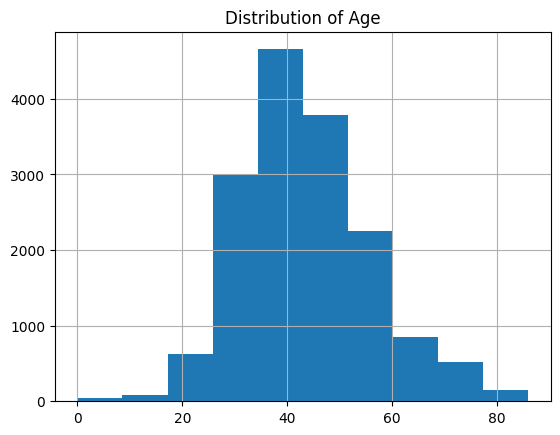

In [82]:

# plot the distribution of the age
client_food_hamper_copy.age.hist()
plt.title("Distribution of Age")
plt.show()


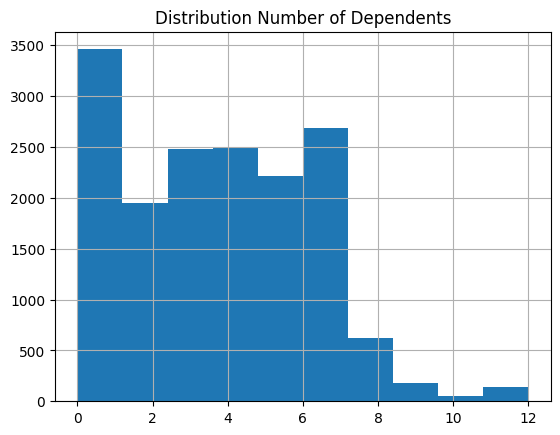

In [83]:


# plot the distribution of the dependents_qty
client_food_hamper_copy.dependents_qty.hist()
plt.title("Distribution Number of Dependents")


plt.show()


Creating charts of the categorical features in the dataset

In [84]:
print(categorical_columns)

Index(['agent_related', 'new_client_id', 'collect_token', 'hamper_type',
       'related_scheduler', 'unique_client', 'Creator_x', 'unique id',
       'address', 'family', 'household', 'latest_contact_method',
       'preferred_contact_methods', 'preferred_languages', 'sex', 'status',
       'worker', 'Slug_y', 'Creator_y'],
      dtype='object')


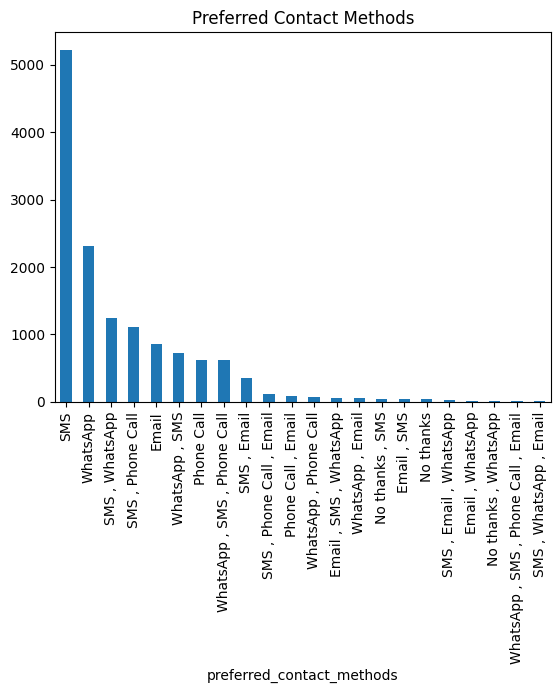

In [85]:
# plot a bar chart of the prefered contact methods
client_food_hamper_copy.preferred_contact_methods.value_counts().plot(kind='bar')
plt.title("Preferred Contact Methods")
plt.show()

Plot a chart of the top 10 preferred languages

<ipython-input-86-199f88cd0226>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis", order=top_languages.index)


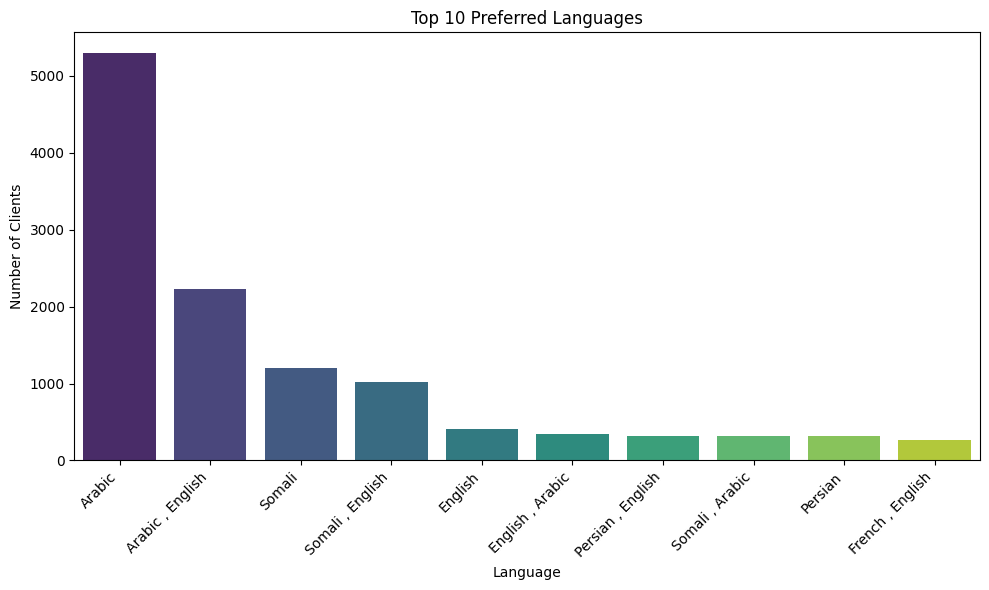

In [86]:



# Chart of preferred languages

top_languages = client_food_hamper_copy['preferred_languages'].value_counts().nlargest(10)
top_languages = top_languages[top_languages.index != 'other'] # Remove "other" language

# Create a bar plot using Seaborn, explicitly specifying the order of categories
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis", order=top_languages.index)

plt.title("Top 10 Preferred Languages")
plt.xlabel("Language")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Plot the counts of the gender

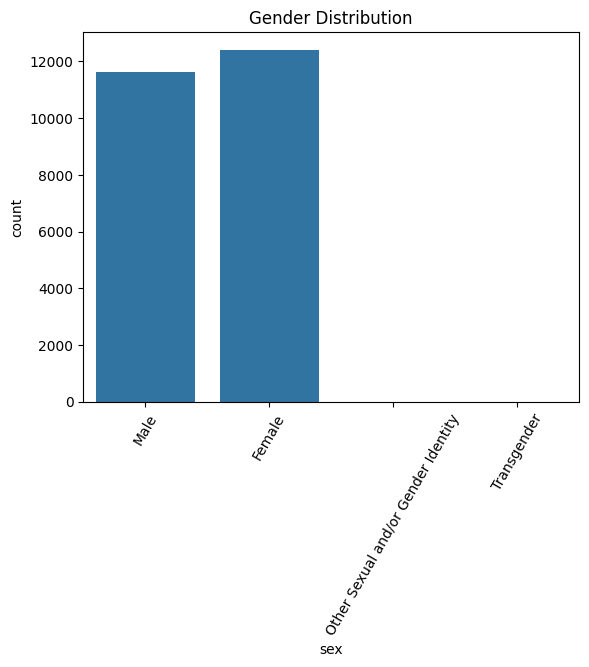

In [87]:
# create count plots for age
sns.countplot(x='sex', data=clients_df)
plt.title('Gender Distribution')

plt.xticks(rotation=60)
plt.show()

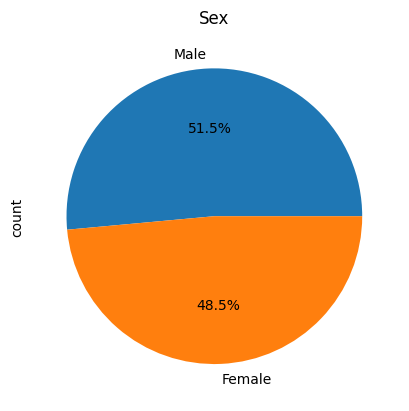

In [88]:
# plot a pie chart of the sex
client_food_hamper_copy.sex.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sex")
plt.show()

Plot a count of the hamper type

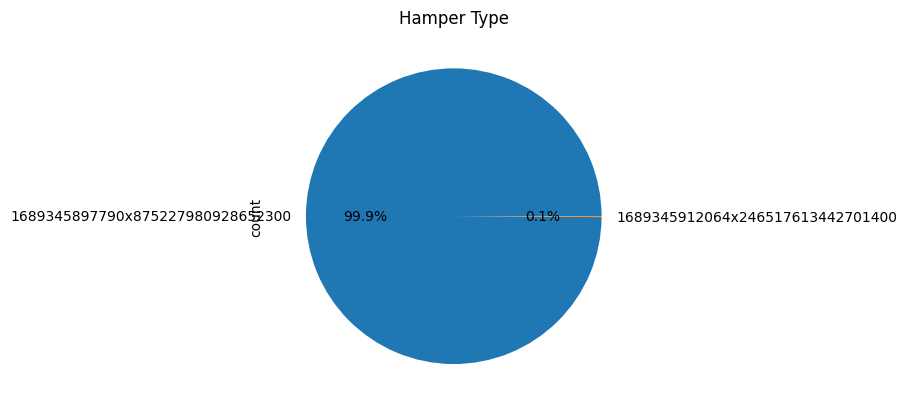

In [89]:
# plot a pie chart of the hamper type
client_food_hamper_copy.hamper_type.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Hamper Type")
plt.show()

Plot a yet of the household feature

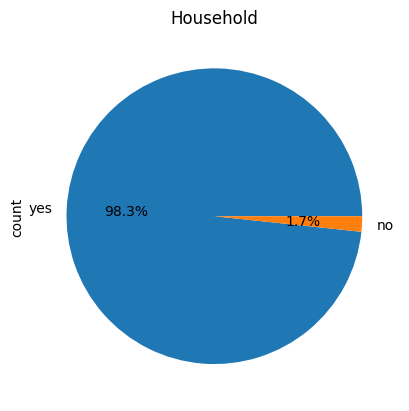

In [90]:
# plot a pie chart of the houshold

client_food_hamper_copy.household.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Household")
plt.show()

Plotting the distribution of the pickup dates per month

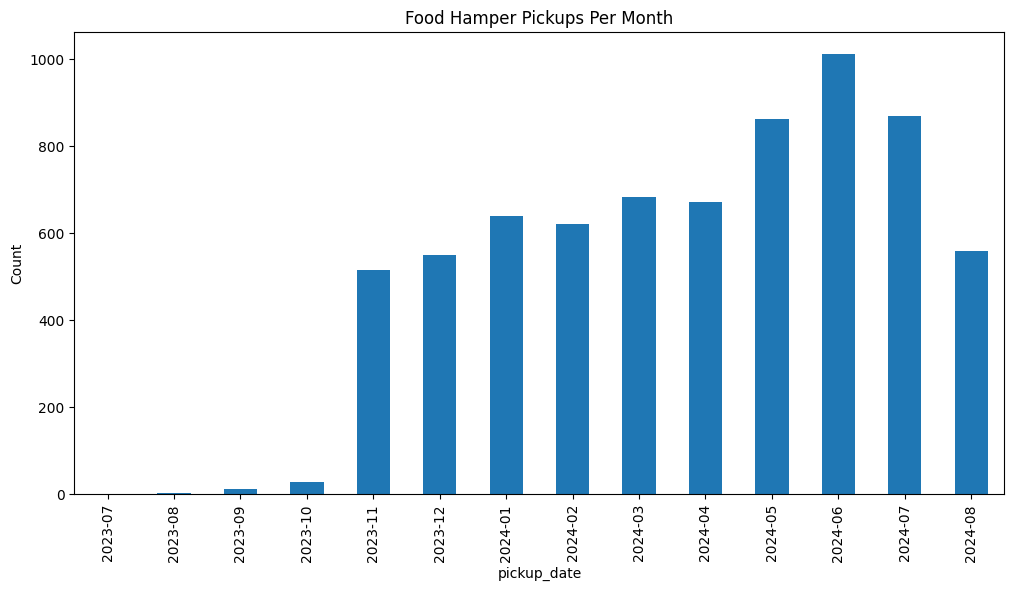

In [91]:
# Plotting the distribution of the pickup dates per month
temp_df = food_hampers_df.groupby(food_hampers_df["pickup_date"].dt.to_period("M")).size()
temp_df.plot(kind="bar", figsize=(12, 6), title="Food Hamper Pickups Per Month")
plt.ylabel("Count")
plt.show()

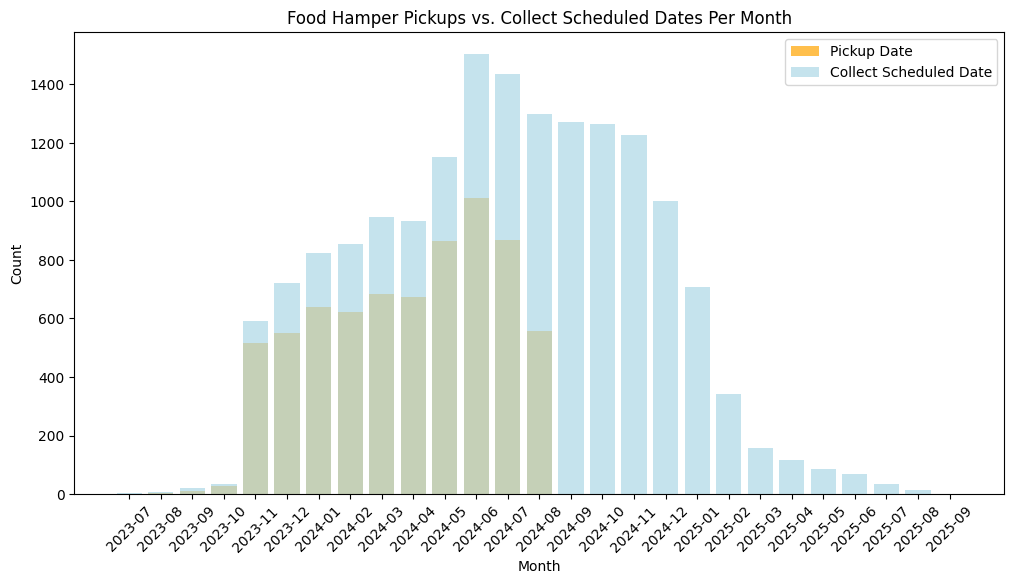

In [92]:
import matplotlib.pyplot as plt

# Group by month for both pickup_date and collect_scheduled_date
pickup_counts = food_hampers_df.groupby(food_hampers_df["pickup_date"].dt.to_period("M")).size()
collect_counts = food_hampers_df.groupby(food_hampers_df["collect_scheduled_date"].dt.to_period("M")).size()

# Convert PeriodIndex to string for plotting
pickup_counts.index = pickup_counts.index.astype(str)
collect_counts.index = collect_counts.index.astype(str)

# Plot both on the same figure
plt.figure(figsize=(12, 6))
plt.bar(pickup_counts.index, pickup_counts, color="orange", alpha=0.7, label="Pickup Date")
plt.bar(collect_counts.index, collect_counts, color="lightblue", alpha=0.7, label="Collect Scheduled Date")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Food Hamper Pickups vs. Collect Scheduled Dates Per Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()  # Add legend

plt.show()


Idetifying and visualizing outliers in the numerical features

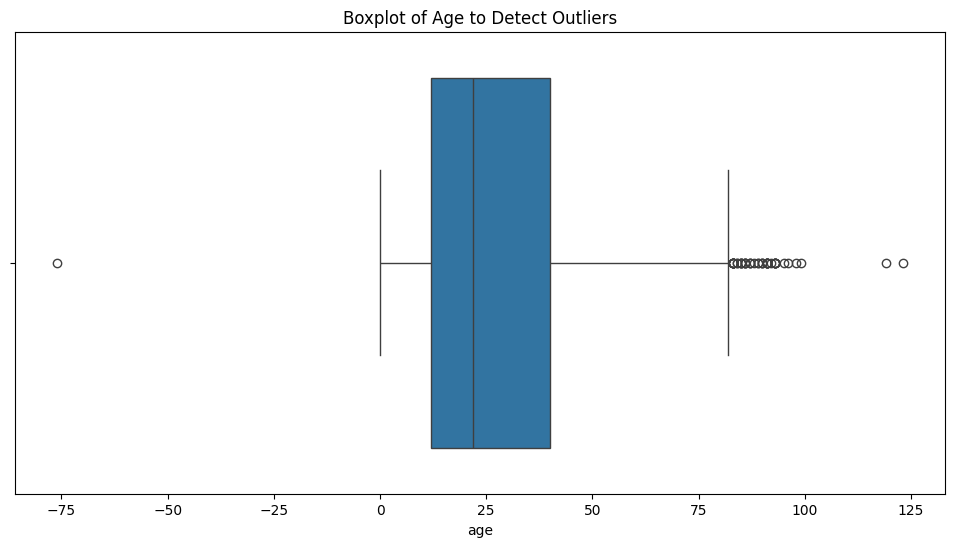

In [93]:
# Create a boxplot of the age column

plt.figure(figsize=(12, 6))
sns.boxplot(x=clients_df['age'])
plt.title("Boxplot of Age to Detect Outliers")
plt.show()

Create a boxplot of the dependents column

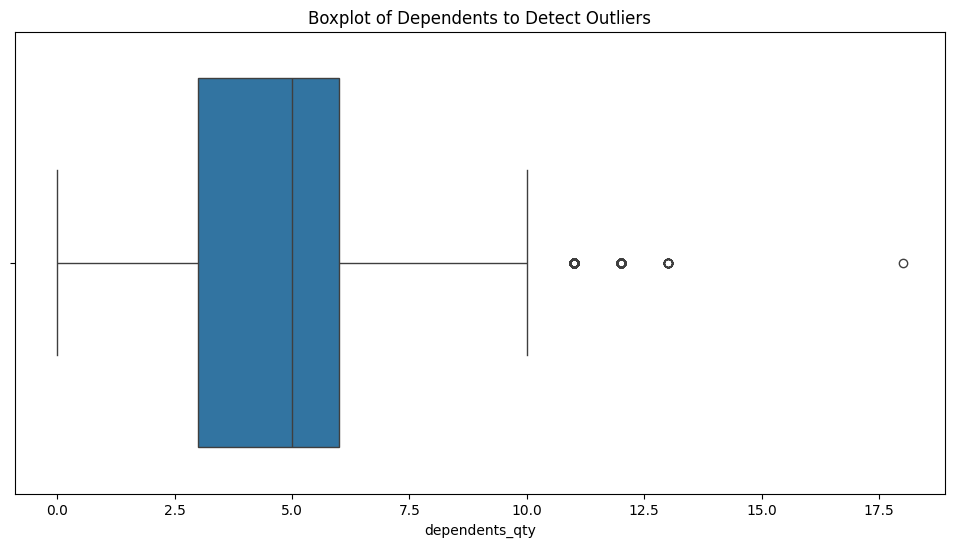

In [94]:
# Create a boxplot of the dependents column

plt.figure(figsize=(12, 6))
sns.boxplot(x=clients_df['dependents_qty'])
plt.title("Boxplot of Dependents to Detect Outliers")
plt.show()

Text(0.5, 1.0, 'Boxplot of Food Hamper Pickups Per Month')

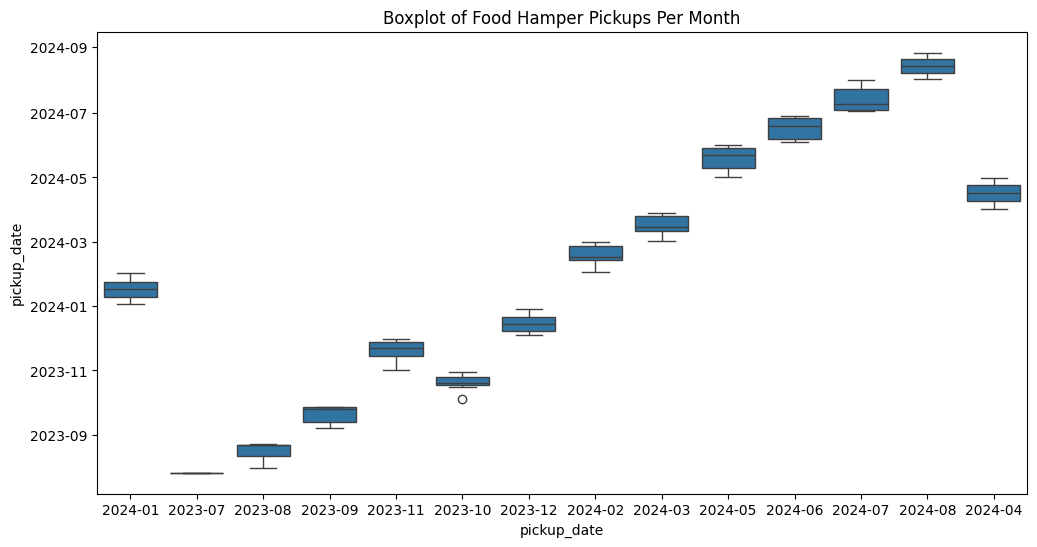

In [95]:
# boxplot to show the number of total hamper pick up per month
plt.figure(figsize=(12, 6))
sns.boxplot(x=food_hampers_df['pickup_date'].dt.to_period('M'), y=food_hampers_df['pickup_date'])
plt.title("Boxplot of Food Hamper Pickups Per Month")

**Summary of patterns observed from the visualizations**



*   The age distribution shows ages between 0 and 18. This might indicate some errors in imputing the ages of clients. Also. from the boxplots, outliers are observed from age 80 and above. A negative (-75) age is also observed which might be due to imputational error.

*   Very few households with family size of more than 8 use the services. Majority of household sizes range between 1 and 7. The boxplot shows outliers for dependent quantity above 10.

*   A vast majority of the clients speak Arabic.

*   Very low numbers of food hamper pickups are observed  in the months of August to October 2023. These are outliers in the dataset and do not truly reflect hamper pick up for those months. The greatest number of food hamper pickup is observed in the month of June. One of the two major muslim festivals - Eid al-Adha is observed in June and with a large base of Arabic speaking clients, this is likely responsible for the highest amount of food hamper pickup in June.

*   Similarly, the largest number of scheduled pickup dates is observed for the month of June.









# Block 5: Feature Relationships

In [96]:
client_food_hamper_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16398 entries, 13 to 16604
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_related              16398 non-null  category      
 1   new_client_id              16398 non-null  category      
 2   collect_scheduled_date     16398 non-null  datetime64[ns]
 3   collect_token              16398 non-null  category      
 4   datetime_from              16398 non-null  datetime64[ns]
 5   datetime_to                16394 non-null  datetime64[ns]
 6   hamper_type                16398 non-null  category      
 7   pickup_date                6999 non-null   datetime64[ns]
 8   related_scheduler          16394 non-null  category      
 9   unique_client              16398 non-null  category      
 10  Creation Date_x            16398 non-null  datetime64[ns]
 11  Modified Date_x            16398 non-null  datetime64[ns]
 12  Creator_

Return the number of visits per client or per family

In [97]:
# Count number of visits per client (based on pickup_date)
hamper_demand_per_client = client_food_hamper_copy.groupby('new_client_id')['pickup_date'].count().reset_index()

# Rename column
hamper_demand_per_client.rename(columns={'pickup_date': 'hamper_visits'}, inplace=True)

# Display the result
print(hamper_demand_per_client.head())

                      new_client_id  hamper_visits
0  1669658091582x874637848970788900              2
1  1673043106565x702758294392930300              6
2  1689345689019x623399745786478600              3
3  1694115474357x134699341188431870              4
4  1694547419532x515953499649605600              3


<ipython-input-97-0e836bd961e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hamper_demand_per_client = client_food_hamper_copy.groupby('new_client_id')['pickup_date'].count().reset_index()


In [98]:


# return the unique number of
hamper_demand_per_client['hamper_visits'].unique()


array([ 2,  6,  3,  4, 12, 10,  8,  7, 13, 11,  5,  9,  1,  0])

In [99]:
# return the frequency of the hamper_visits unique numbers
hamper_demand_per_client['hamper_visits'].value_counts()

,count
hamper_visits,
10,145
9,121
8,112
11,102
7,101
1,93
6,75
3,63
2,62


Check for correlation between the number of visits per client and age and dependents_qty

In [100]:
df = client_food_hamper_copy  # Original dataset

# Merge on 'new_client_id'
df_merged = df.merge(hamper_demand_per_client, on='new_client_id', how='left')

# Select numerical features for correlation
numerical_features = ['hamper_visits', 'age', 'dependents_qty']

# Drop rows with missing numerical values
df_corr = df_merged[numerical_features].dropna()

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Display correlation values
print(correlation_matrix)


                hamper_visits       age  dependents_qty
hamper_visits        1.000000  0.165757        0.072882
age                  0.165757  1.000000       -0.143977
dependents_qty       0.072882 -0.143977        1.000000


Using boxplots to visualize how categorical features affect hamper visits

In [101]:
df_merged['household'] = df_merged['household'].astype(str)
df_merged['dependents_qty'] = df_merged['dependents_qty'].astype(str)


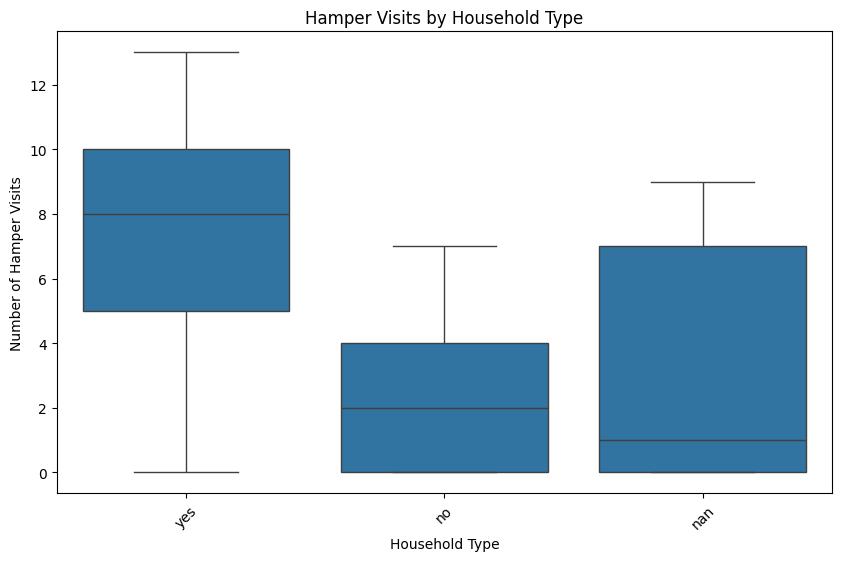

In [102]:
# Boxplot of hamper visits by household type

plt.figure(figsize=(10, 6))
sns.boxplot(x='household', y='hamper_visits', data=df_merged)
plt.xticks(rotation=45)
plt.title("Hamper Visits by Household Type")
plt.xlabel("Household Type")
plt.ylabel("Number of Hamper Visits")
plt.show()


Individuals from households tend to have an higher number of hamper visits compared to single individuals

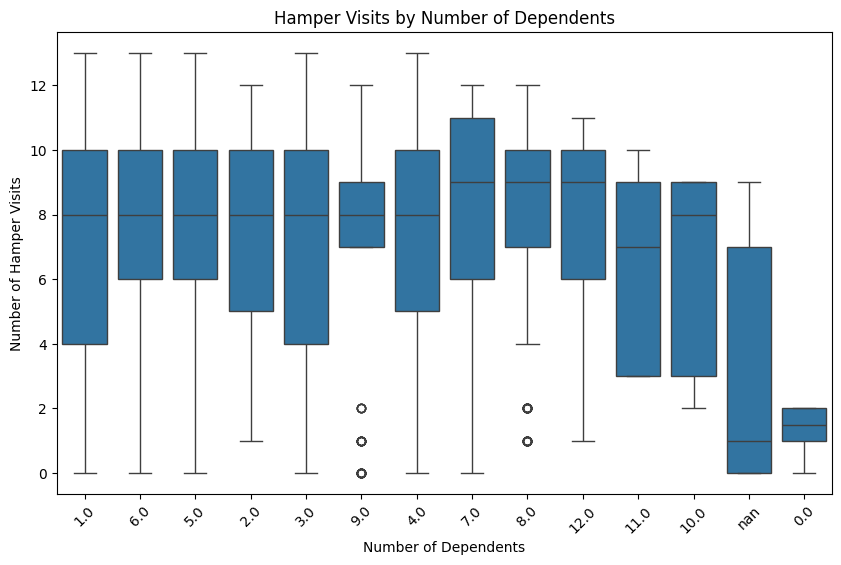

In [103]:
# Boxplot of hamper visits by number of dependents
plt.figure(figsize=(10, 6))
sns.boxplot(x='dependents_qty', y='hamper_visits', data=df_merged)
plt.xticks(rotation=45)
plt.title("Hamper Visits by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Number of Hamper Visits")
plt.show()


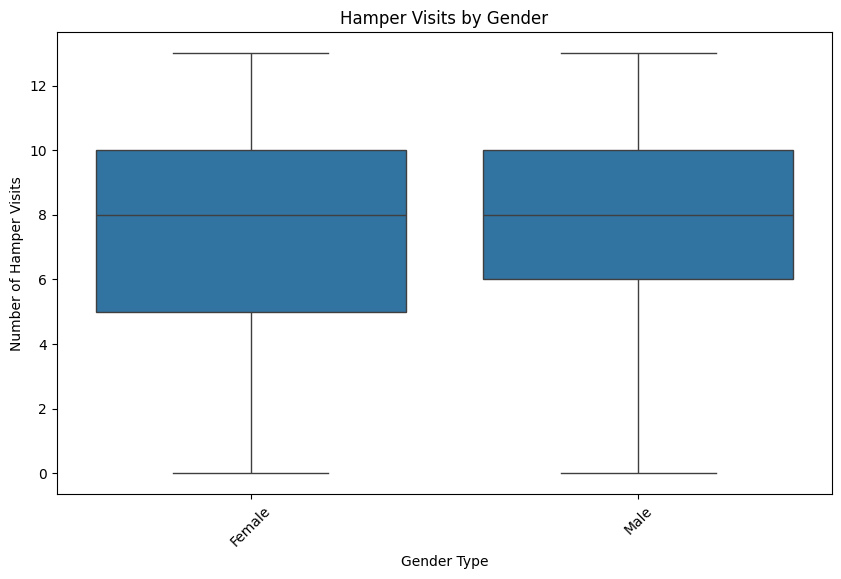

In [104]:
# Boxplot of hamper visits by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='hamper_visits', data=df_merged)
plt.xticks(rotation=45)
plt.title("Hamper Visits by Gender")
plt.xlabel("Gender Type")
plt.ylabel("Number of Hamper Visits")
plt.show()


Aggregate hamper visits by month

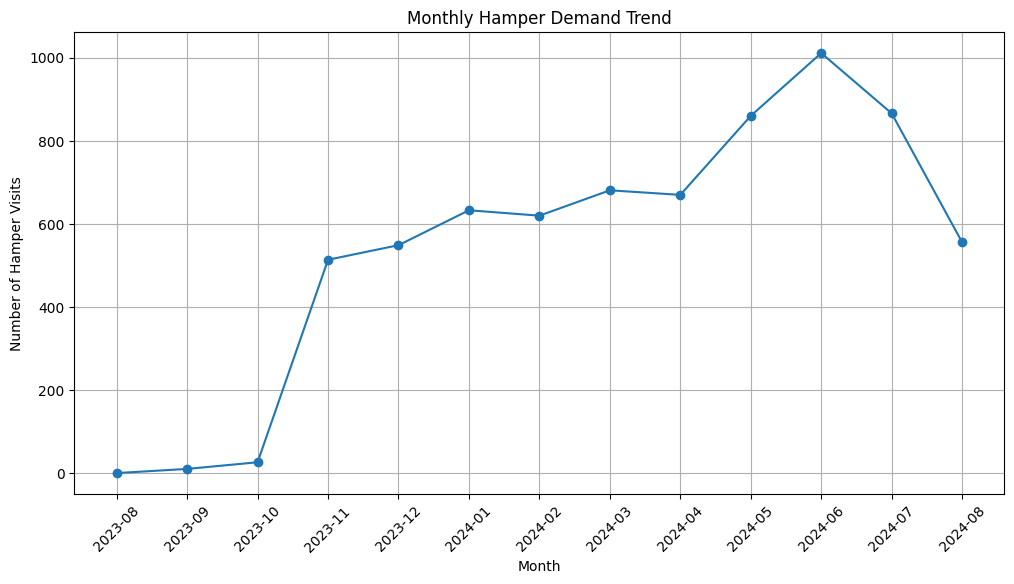

In [105]:


# Extract year and month
df['year_month'] = df['pickup_date'].dt.to_period('M')  # YYYY-MM format

# Aggregate hamper visits per month
hamper_demand_trend = df.groupby('year_month')['pickup_date'].count().reset_index()
hamper_demand_trend.rename(columns={'pickup_date': 'hamper_visits'}, inplace=True)

# Convert 'year_month' to string for plotting
hamper_demand_trend['year_month'] = hamper_demand_trend['year_month'].astype(str)

# Plot Monthly Trends
plt.figure(figsize=(12, 6))
plt.plot(hamper_demand_trend['year_month'], hamper_demand_trend['hamper_visits'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Hamper Visits")
plt.title("Monthly Hamper Demand Trend")
plt.grid()
plt.show()




Aggregate by dependent quantity

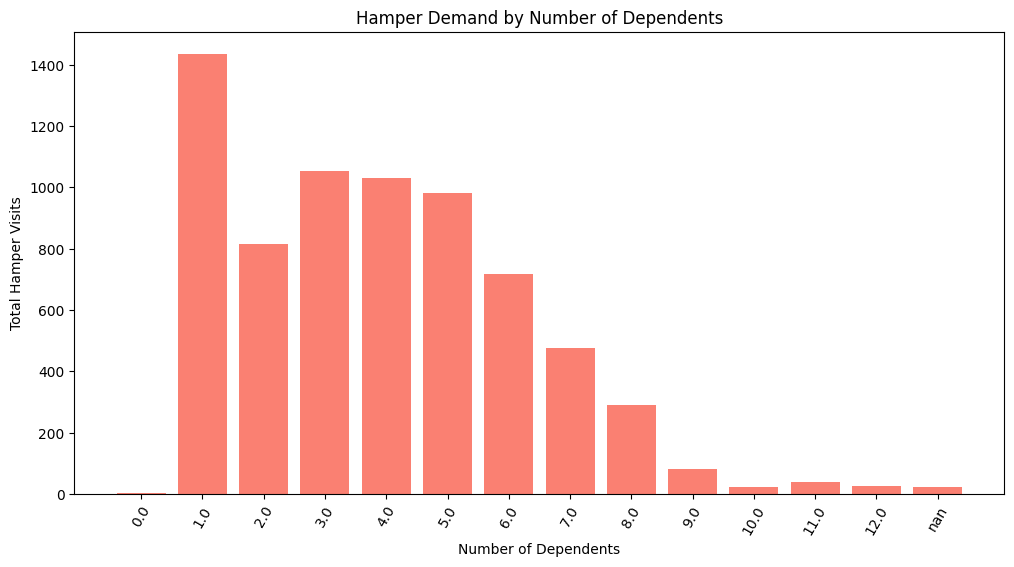

In [106]:
# Convert dependents_qty to string
df['dependents_qty'] = df['dependents_qty'].astype(str)

# Aggregate: Average hamper visits per number of dependents
hamper_by_dependents = df.groupby('dependents_qty')['pickup_date'].count().reset_index()
hamper_by_dependents.rename(columns={'pickup_date': 'total_hamper_visits'}, inplace=True)

# Convert 'dependents_qty' to numeric for proper sorting
hamper_by_dependents['dependents_qty'] = pd.to_numeric(hamper_by_dependents['dependents_qty'], errors='coerce')

# Sort by 'dependents_qty' in ascending order
hamper_by_dependents = hamper_by_dependents.sort_values(by='dependents_qty', ascending=True)

# Convert 'dependents_qty' back to string for plotting (if desired)
hamper_by_dependents['dependents_qty'] = hamper_by_dependents['dependents_qty'].astype(str)


# Plot Dependents vs. Hamper Demand
plt.figure(figsize=(12, 6))
plt.bar(hamper_by_dependents['dependents_qty'], hamper_by_dependents['total_hamper_visits'], color='salmon')
plt.xlabel("Number of Dependents")
plt.xticks(rotation=60)
plt.ylabel("Total Hamper Visits")
plt.title("Hamper Demand by Number of Dependents")
plt.show()

Aggregate by household size

<ipython-input-107-8a3fa392b2c7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hamper_by_household = df.groupby('household')['pickup_date'].count().reset_index()


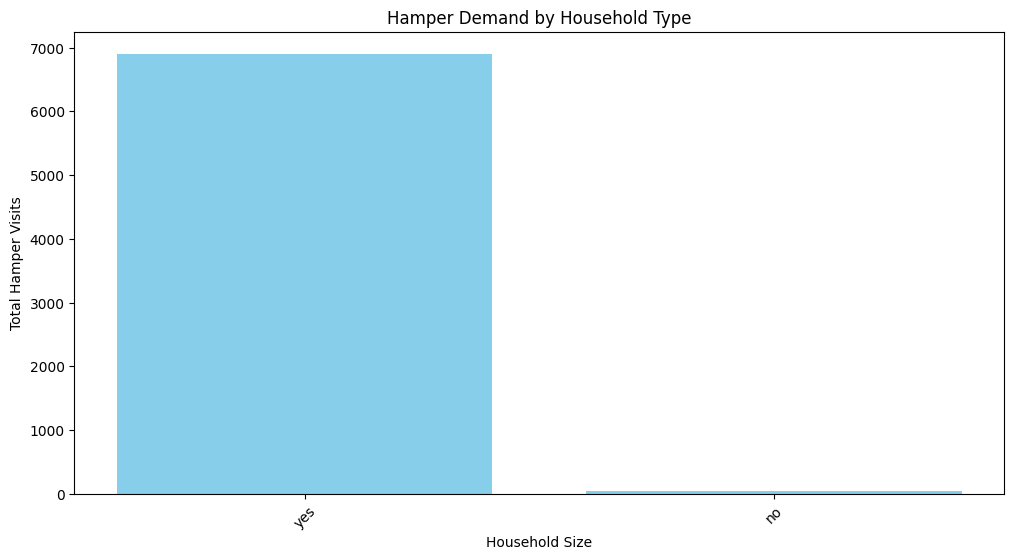

In [107]:
# Convert household to string (if categorical)
df['dw'] = df['household'].astype(str)

# Aggregate: Average and total hamper visits per household size
hamper_by_household = df.groupby('household')['pickup_date'].count().reset_index()
hamper_by_household.rename(columns={'pickup_date': 'total_hamper_visits'}, inplace=True)

# Sort by household size
hamper_by_household = hamper_by_household.sort_values(by='total_hamper_visits', ascending=False)

# Plot Household Size vs. Hamper Demand
plt.figure(figsize=(12, 6))
plt.bar(hamper_by_household['household'], hamper_by_household['total_hamper_visits'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Household Size")
plt.ylabel("Total Hamper Visits")
plt.title("Hamper Demand by Household Type")
plt.show()


In [108]:
# Merge hamper_demand_per_client with the original dataframe to get preferred_languages
merged_df = pd.merge(hamper_demand_per_client, client_food_hamper_copy[['new_client_id', 'preferred_languages']], on='new_client_id', how='left')

# Aggregate hamper_visits by preferred_languages
hamper_visits_by_language = merged_df.groupby('preferred_languages')['hamper_visits'].sum().reset_index()

# Display the result
print(hamper_visits_by_language)

    preferred_languages  hamper_visits
0             Afrikaans            656
1    Afrikaans , Arabic            189
2   Afrikaans , English            255
3   Albanian , Albanian             52
4    Albanian , Italian             39
..                  ...            ...
93       Turkish , Dari            184
94                 Urdu            420
95       Urdu , English            253
96        Urdu , Pashto            112
97       Urdu , Punjabi              1

[98 rows x 2 columns]


<ipython-input-108-3ba7ed55de64>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hamper_visits_by_language = merged_df.groupby('preferred_languages')['hamper_visits'].sum().reset_index()


<ipython-input-109-449eadd00a3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preferred_languages', y='hamper_visits', data=filtered_data, palette="viridis", order=top_10_languages)  # Specify order


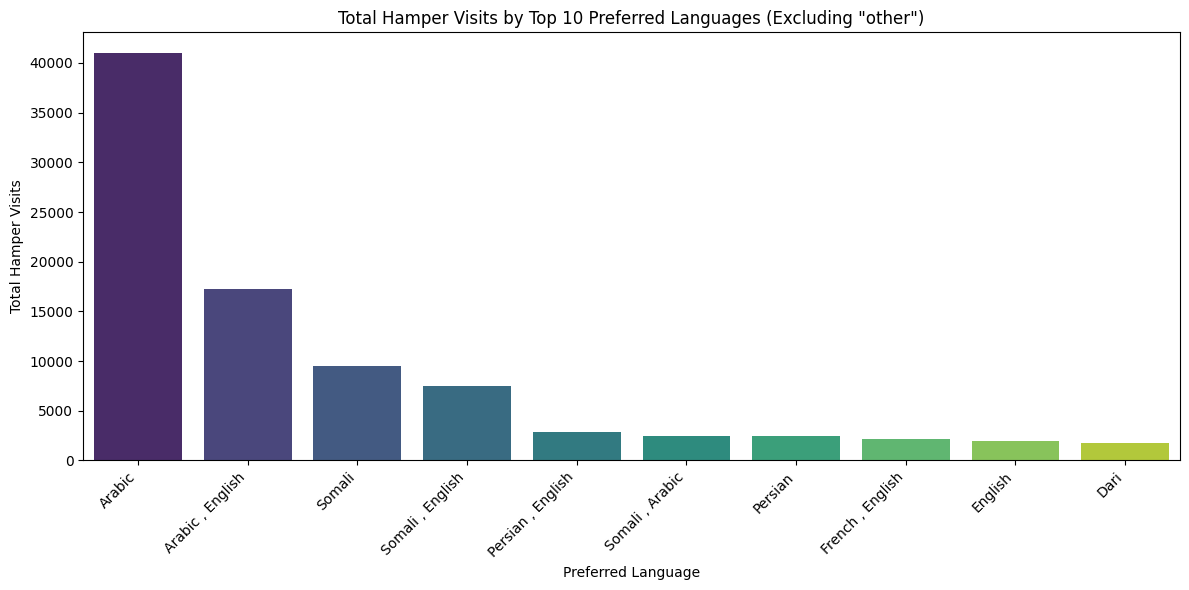

In [109]:

# Get the top 10 most spoken languages
top_10_languages = hamper_visits_by_language[hamper_visits_by_language['preferred_languages'] != 'other'].nlargest(10, 'hamper_visits')['preferred_languages'].tolist()

# Filter the data for the top 10 languages
filtered_data = hamper_visits_by_language[hamper_visits_by_language['preferred_languages'].isin(top_10_languages)]

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='preferred_languages', y='hamper_visits', data=filtered_data, palette="viridis", order=top_10_languages)  # Specify order
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.title('Total Hamper Visits by Top 10 Preferred Languages (Excluding "other")')
plt.xlabel('Preferred Language')
plt.ylabel('Total Hamper Visits')
plt.tight_layout()
plt.show()

In [110]:
# Aggregate hamper visits by age
hamper_visits_by_age = client_food_hamper_copy.groupby('age')['pickup_date'].count().reset_index()

# Rename the 'pickup_date' column to 'total_hamper_visits'
hamper_visits_by_age.rename(columns={'pickup_date': 'total_hamper_visits'}, inplace=True)

# Display the result
print(hamper_visits_by_age)

     age  total_hamper_visits
0    0.0                    3
1    1.0                    1
2    2.0                    0
3    3.0                    4
4    4.0                    0
..   ...                  ...
71  80.0                    9
72  82.0                   10
73  83.0                   19
74  84.0                   11
75  86.0                    5

[76 rows x 2 columns]


<ipython-input-111-b35f34acbbc2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hamper_visits_by_age_group = client_food_hamper_copy.groupby('age_group')['pickup_date'].count().reset_index()
<ipython-input-111-b35f34acbbc2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='total_hamper_visits', data=hamper_visits_by_age_group, palette="viridis")


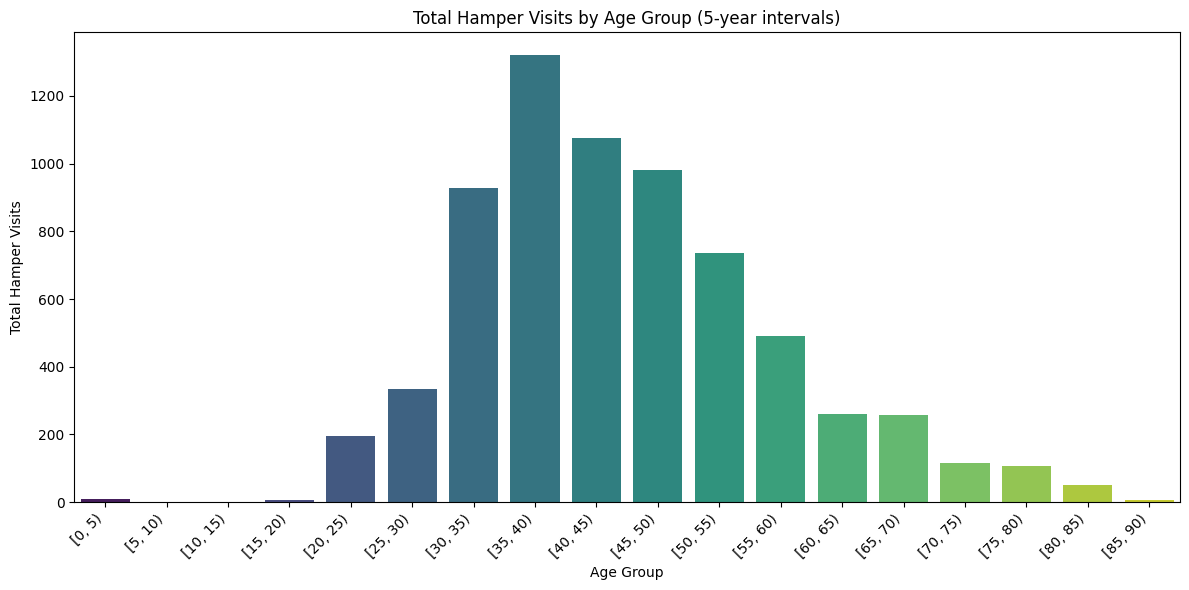

In [111]:

# Create age groups with intervals of 5
client_food_hamper_copy['age_group'] = pd.cut(client_food_hamper_copy['age'], bins=range(0, int(client_food_hamper_copy['age'].max()) + 5, 5), right=False)

# Aggregate hamper visits by age group
hamper_visits_by_age_group = client_food_hamper_copy.groupby('age_group')['pickup_date'].count().reset_index()
hamper_visits_by_age_group.rename(columns={'pickup_date': 'total_hamper_visits'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='total_hamper_visits', data=hamper_visits_by_age_group, palette="viridis")
plt.title('Total Hamper Visits by Age Group (5-year intervals)')
plt.xlabel('Age Group')
plt.ylabel('Total Hamper Visits')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Summarize key findings and explain how these trends may help predict overall hamper demand.**



*   The number of visits made by each unique client ranges from 0 to 13, with the most clients returning up to 10 times.

*   No significant correlation is observed between the age, dependents_qty and the number of hamper visits. This might indicate that other factors might be responsible for client retention and client repeat visits.

*   Individuals with 1 dependent quantity or family size collect hampers most often compared to all the other number of dependents quantity. However, cumulatively, individuals from households collect the most hamper or have the most hamper visits.

*   Arabic speakers have the most total hamper visits. This could imply that the ability of the workers to communicate with the clients in the preferred language might be a contributing factor to client retention.

*   Clients between the age of 35 to 40 have the most number of hamper visits. This is justifiable as this age group has the highest number of clients in IFSSA's database. Other  age demographics can be targeted for enhancement in retention.

* We will further investigate hamper visits based on nearness to pickup location when we create the location feature in the feature engineering notebook.










# Inputting Missing Value

We would handle some of the missing values using methods that ensure there is no data leakage

In [112]:
client_food_hamper_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16398 entries, 13 to 16604
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_related              16398 non-null  category      
 1   new_client_id              16398 non-null  category      
 2   collect_scheduled_date     16398 non-null  datetime64[ns]
 3   collect_token              16398 non-null  category      
 4   datetime_from              16398 non-null  datetime64[ns]
 5   datetime_to                16394 non-null  datetime64[ns]
 6   hamper_type                16398 non-null  category      
 7   pickup_date                6999 non-null   datetime64[ns]
 8   related_scheduler          16394 non-null  category      
 9   unique_client              16398 non-null  category      
 10  Creation Date_x            16398 non-null  datetime64[ns]
 11  Modified Date_x            16398 non-null  datetime64[ns]
 12  Creator_

In [113]:
# drop missing pickup dates
client_food_hamper_copy.dropna(subset=['pickup_date'], inplace=True)

In [114]:
# Rename dataframe
df = client_food_hamper_copy

In [115]:
# drop all columns with suffix _y and _x
df.drop(df.filter(regex='_y$').columns, axis=1, inplace=True)

df.columns = df.columns.str.rstrip('_x')


In [116]:
# rename se column to sex
df.rename(columns={'se': 'sex'}, inplace=True)

In [117]:
# drop the age column
df.drop(columns=['age'], inplace=True)

# drop latest_contact_method column
df.drop(columns=['latest_contact_method'], inplace=True)

# drop worker column
df.drop(columns=['worker'], inplace=True)

In [118]:
# fill missing family rows using mode
df['family'] = df['family'].fillna(df['family'].mode()[0])

In [119]:
# fill missing household rows using mode
df['household'] = df['household'].fillna(df['household'].mode()[0])

In [120]:
# fill missing "preferred_contact_methods" rows based on mode for each unique new_client_id
df['preferred_contact_methods'] = df.groupby('new_client_id')['preferred_contact_methods'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


<ipython-input-120-f74d9a833257>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['preferred_contact_methods'] = df.groupby('new_client_id')['preferred_contact_methods'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [121]:

# fill preferred_contact_methods using mode
df['preferred_contact_methods'] = df['preferred_contact_methods'].fillna(df['preferred_contact_methods'].mode()[0])

In [122]:
# fill preferred_contact_methods using mode
df['preferred_languages'] = df['preferred_languages'].fillna(df['preferred_languages'].mode()[0])

In [123]:
# fill missing sex rows based on mode for each unique new_client_id
df['sex'] = df.groupby('new_client_id')['sex'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


<ipython-input-123-c46acae70ac5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['sex'] = df.groupby('new_client_id')['sex'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [124]:
# fill missing household rows using mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [125]:
# fill missing household rows using mode
df['age_group'] = df['age_group'].fillna(df['age_group'].mode()[0])

In [126]:
# drop missing rows in datetime_to
df.dropna(subset=['datetime_to'], inplace=True)

In [127]:
# drop missing rows in related_scheduler
df.dropna(subset=['related_scheduler'], inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 19 to 16604
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   agent_related              6996 non-null   category      
 1   new_client_id              6996 non-null   category      
 2   collect_scheduled_date     6996 non-null   datetime64[ns]
 3   collect_token              6996 non-null   category      
 4   datetime_from              6996 non-null   datetime64[ns]
 5   datetime_to                6996 non-null   datetime64[ns]
 6   hamper_type                6996 non-null   category      
 7   pickup_date                6996 non-null   datetime64[ns]
 8   related_scheduler          6996 non-null   category      
 9   unique_client              6996 non-null   category      
 10  Creation Date              6996 non-null   datetime64[ns]
 11  Modified Date              6996 non-null   datetime64[ns]
 12  Creator  

Download cleaned data and continue othr transformations in the next notebook

In [129]:
# download cleaned data
df.to_csv('Cleaned_Hamper_Data.csv', index=False)